In [12]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)


11490434/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.9/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


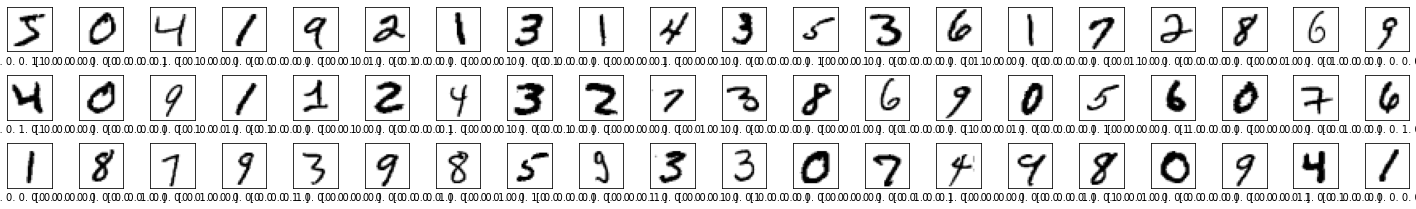

In [ ]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 

In [ ]:
def build_model():
    model = keras.Sequential([
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dense(128, activation="relu"),
            layers.Dense(10, activation="softmax"),
        ])
    return model

model = build_model()

In [ ]:
model_sgd = build_model()

model_sgd.compile(                            #SGD optimizer & the loss function is categorical_crossentropy
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"],
)
#neural network model build
model_adam = build_model()
model_adam.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)
# Build a third neural network model

model_rmsprop = build_model()
model_rmsprop.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=["accuracy"],
)

In [ ]:
history_sgd = model_sgd.fit(x_train, y_train, epochs=7, batch_size=64, validation_split=0.2)

history_adam = model_adam.fit(x_train, y_train, epochs=7, batch_size=64, validation_split=0.2)

history_rmsprop = model_rmsprop.fit(x_train, y_train, epochs=7, batch_size=64, validation_split=0.2)

test_loss_sgd, test_acc_sgd = model_sgd.evaluate(x_test, y_test)
test_loss_adam, test_acc_adam = model_adam.evaluate(x_test, y_test)
test_loss_rmsprop, test_acc_rmsprop = model_rmsprop.evaluate(x_test, y_test)

print('Test set accuracy for SGD optimizer:', test_acc_sgd)
print('Test set accuracy for Adam optimizer:', test_acc_adam)
print('Test set accuracy for RMSprop optimizer:', test_acc_rmsprop)

Epoch 1/7
750/750 [==============================] - 37s 47ms/step - loss: 0.9874 - accuracy: 0.7086 - val_loss: 0.3109 - val_accuracy: 0.9053
Epoch 2/7
750/750 [==============================] - 33s 44ms/step - loss: 0.2628 - accuracy: 0.9204 - val_loss: 0.2126 - val_accuracy: 0.9367
Epoch 3/7
750/750 [==============================] - 34s 45ms/step - loss: 0.1801 - accuracy: 0.9460 - val_loss: 0.1408 - val_accuracy: 0.9591
Epoch 4/7
750/750 [==============================] - 34s 45ms/step - loss: 0.1379 - accuracy: 0.9581 - val_loss: 0.1211 - val_accuracy: 0.9658
Epoch 5/7
750/750 [==============================] - 32s 43ms/step - loss: 0.1124 - accuracy: 0.9653 - val_loss: 0.1005 - val_accuracy: 0.9723
Epoch 6/7
750/750 [==============================] - 33s 44ms/step - loss: 0.0971 - accuracy: 0.9711 - val_loss: 0.0936 - val_accuracy: 0.9720
Epoch 7/7
750/750 [==============================] - 33s 44ms/step - loss: 0.0851 - accuracy: 0.9744 - val_loss: 0.0859 - val_accuracy: 0.9752

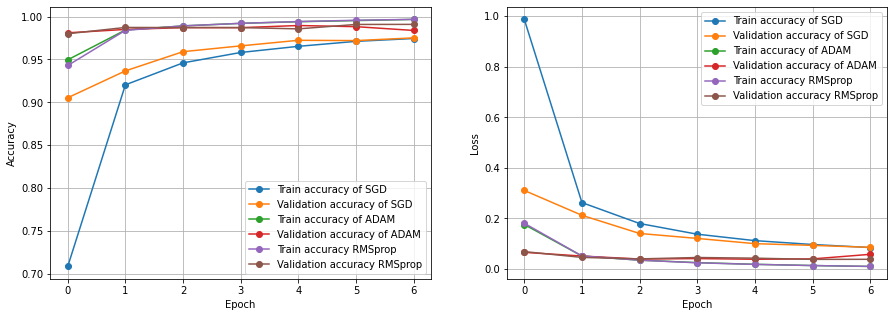

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history_sgd.history['accuracy'], 'o-', label='Train accuracy of SGD ')
plt.plot(history_sgd.history['val_accuracy'], 'o-', label = 'Validation accuracy of SGD')
plt.plot(history_adam.history['accuracy'], 'o-', label='Train accuracy of ADAM')
plt.plot(history_adam.history['val_accuracy'], 'o-', label = 'Validation accuracy of ADAM')
plt.plot(history_rmsprop.history['accuracy'], 'o-', label='Train accuracy RMSprop')
plt.plot(history_rmsprop.history['val_accuracy'], 'o-', label = 'Validation accuracy RMSprop')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(history_sgd.history['loss'], 'o-', label='Train accuracy of SGD ')
plt.plot(history_sgd.history['val_loss'], 'o-', label='Validation accuracy of SGD')
plt.plot(history_adam.history['loss'], 'o-', label='Train accuracy of ADAM')
plt.plot(history_adam.history['val_loss'], 'o-', label='Validation accuracy of ADAM')
plt.plot(history_rmsprop.history['loss'], 'o-', label='Train accuracy RMSprop')
plt.plot(history_rmsprop.history['val_loss'], 'o-', label='Validation accuracy RMSprop')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()